In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import files


uploaded = files.upload()


Saving Books_Data_Clean.csv to Books_Data_Clean.csv


In [4]:
df=pd.read_csv("Books_Data_Clean.csv")

In [5]:
df.head()

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


In [10]:
df.describe()

,index,Publishing Year,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sale price,sales rank,units sold
count,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000
mean,535.096154,1994.651822,4.008036,94866.456478,1819.810202,830.526735,4.814798,612.216599,9863.664980
std,307.964846,23.261176,0.246226,31386.007183,3947.719012,2275.742467,3.568810,368.666451,15461.338997
min,0.000000,1901.000000,2.970000,27308.000000,104.940000,0.000000,0.990000,1.000000,106.000000
25%,271.750000,1989.000000,3.850000,70663.250000,355.810000,0.000000,1.990000,292.500000,566.250000
50%,534.500000,2003.000000,4.020000,89309.000000,788.535000,267.120000,3.990000,595.500000,3969.000000
75%,797.250000,2010.000000,4.170000,113441.250000,1469.157500,713.263500,6.990000,924.500000,5454.000000
max,1069.000000,2016.000000,4.770000,206792.000000,47795.000000,28677.000000,33.860000,1273.000000,61560.000000


In [7]:
df=df[df["Publishing Year"]>1900]

In [9]:
df.dropna(subset=["Book Name"],inplace=True)

In [11]:
df.nunique()

,0
index,988
Publishing Year,101
Book Name,987
Author,669
language_code,8
Author_Rating,4
Book_average_rating,133
Book_ratings_count,983
genre,4
gross sales,774


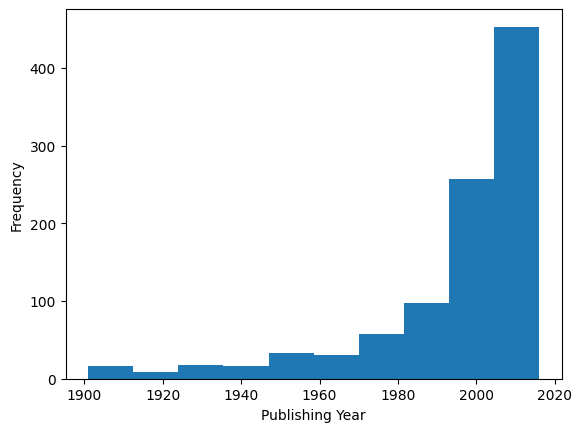

In [12]:
plt.hist(df["Publishing Year"])
plt.xlabel("Publishing Year")
plt.ylabel("Frequency")
plt.show()

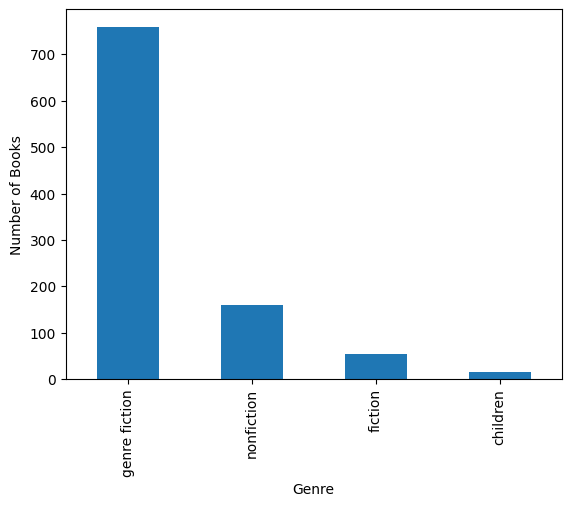

In [13]:
df["genre"].value_counts().plot(kind="bar")
plt.xlabel("Genre")
plt.ylabel("Number of Books")
plt.show()

In [16]:
df.groupby("Author")["Book_average_rating"].mean().sort_values(ascending=False)

,Book_average_rating
Author,
Bill Watterson,4.650000
"Bill Watterson, G.B. Trudeau",4.610000
J.R.R. Tolkien,4.590000
George R.R. Martin,4.560000
Sarah J. Maas,4.526000
...,...
Chetan Bhagat,3.273333
Audrey Niffenegger,3.230000
"Herman Koch, Sam Garrett",3.220000


<Axes: xlabel='genre', ylabel='Book_ratings_count'>

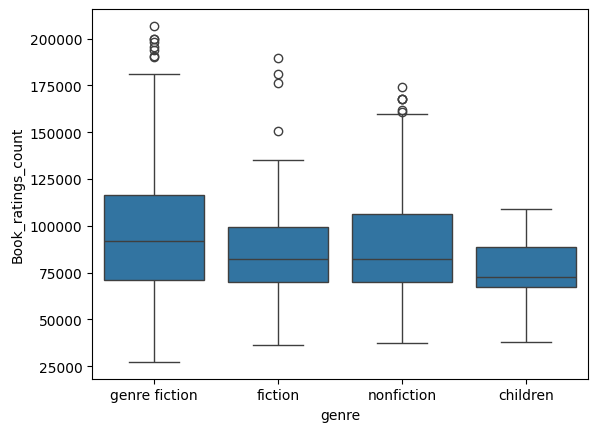

In [17]:
sns.boxplot(x="genre",y="Book_ratings_count",data=df)

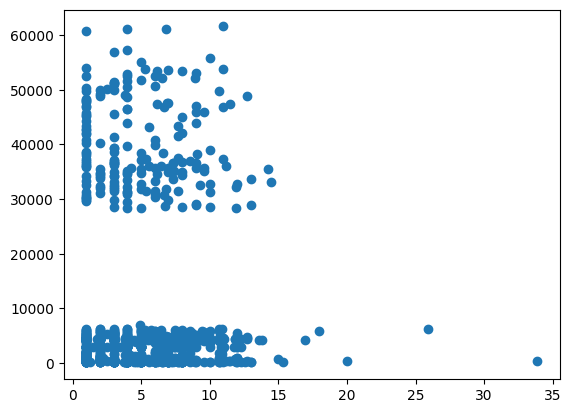

In [18]:
plt.scatter(df["sale price"], df["units sold"])

In [20]:
df["language_code"].value_counts().sort_values(ascending=False)

,count
language_code,
eng,670
en-US,226
en-GB,29
en-CA,7
fre,4
spa,2
ara,2
nl,1


In [21]:
language_counts=df["language_code"].value_counts()

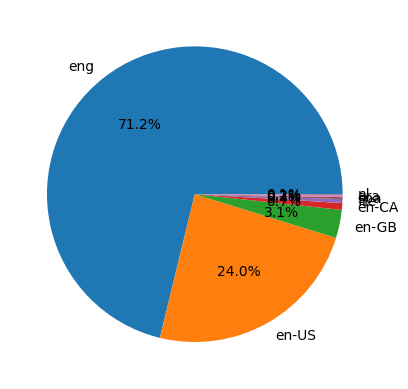

In [22]:
plt.pie(language_counts,labels=language_counts.index,autopct="%1.1f%%")
plt.show()

In [23]:
df.columns


Index(['index', 'Publishing Year', 'Book Name', 'Author', 'language_code',
       'Author_Rating', 'Book_average_rating', 'Book_ratings_count', 'genre',
       'gross sales', 'publisher revenue', 'sale price', 'sales rank',
       'Publisher ', 'units sold'],
      dtype='object')

In [25]:
df.groupby("Publisher ")["publisher revenue"].sum().sort_values(ascending=False)

,publisher revenue
Publisher,
Penguin Group (USA) LLC,191581.104
Random House LLC,174956.244
"Amazon Digital Services, Inc.",141767.772
HarperCollins Publishers,121769.814
Hachette Book Group,107410.968
Simon and Schuster Digital Sales Inc,46858.206
Macmillan,31249.830
HarperCollins Publishing,2830.806
HarperCollins Christian Publishing,2135.670


In [31]:
df.groupby("Author_Rating")["Book_ratings_count"].mean()

,Book_ratings_count
Author_Rating,
Excellent,83804.800595
Famous,98295.250000
Intermediate,101400.272569
Novice,87318.464286


In [33]:
df.groupby("language_code").size().sort_values(ascending=False)

,0
language_code,
eng,670
en-US,226
en-GB,29
en-CA,7
fre,4
ara,2
spa,2
nl,1


In [35]:
df.groupby("Author_Rating")["Book_ratings_count"].median()

,Book_ratings_count
Author_Rating,
Excellent,81609.5
Famous,90527.0
Intermediate,98254.5
Novice,77446.5


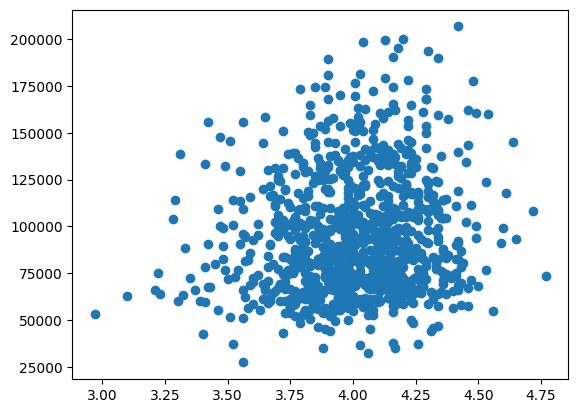

In [36]:
plt.scatter(df["Book_average_rating"],df["Book_ratings_count"])

In [37]:
total_gross_sales=df.groupby("Author")["gross sales"].sum()

<Axes: xlabel='Author'>

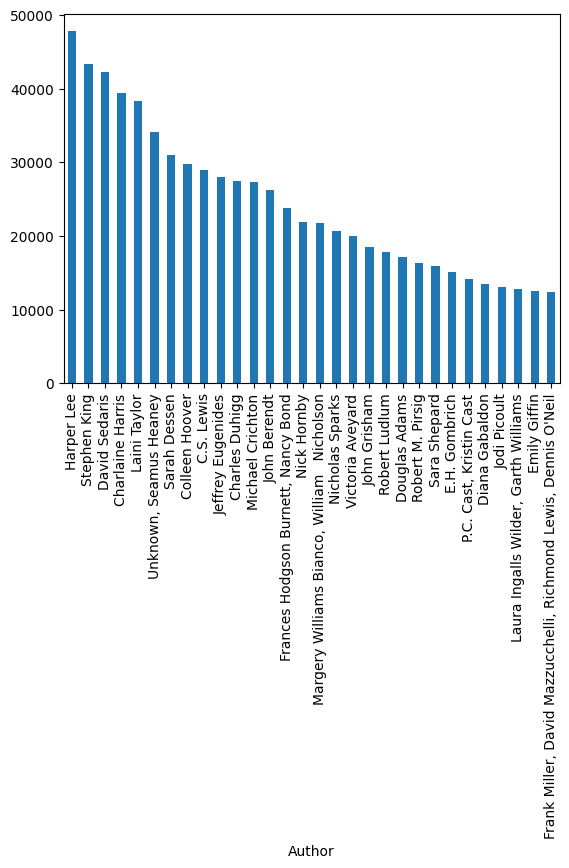

In [42]:
total_gross_sales.sort_values(ascending=False).head(30).plot(kind= "bar")


<Axes: xlabel='Author_Rating', ylabel='units sold'>

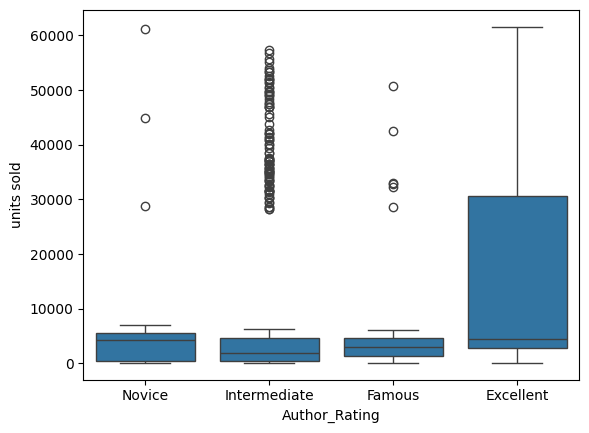

In [43]:
sns.boxplot(x="Author_Rating",y="units sold",data=df)

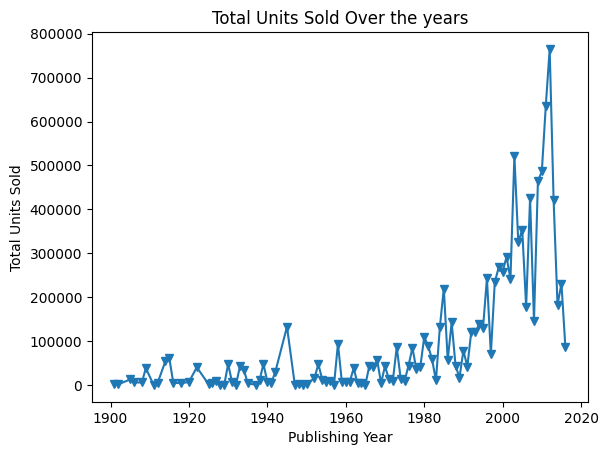

In [46]:
df.groupby("Publishing Year")["units sold"].sum().plot(kind="line",marker="v")
plt.xlabel("Publishing Year")
plt.ylabel("Total Units Sold")
plt.title("Total Units Sold Over the years")
plt.show()